In [207]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from sklearn.compose import make_column_selector as selector #Para seleccionar de forma automática las variables numéricas y categóricas
from sklearn.preprocessing import OneHotEncoder #Para codificar las variables categóricas usando dummies
from sklearn.preprocessing import StandardScaler #Para normalizar las variables numéricas
from sklearn.compose import ColumnTransformer #Modifica las columnas usando los preprocesadores
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline #Planifica una secuencia de procesos
from sklearn import set_config #Para mostrar graficamente el pipeline
from sklearn.model_selection import GridSearchCV

set_config(display='diagram')
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [208]:
houses_df = pd.read_csv('train.csv')

houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [209]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(houses_df.drop(['Id', 'SalePrice'], axis=1))
categorical_columns = categorical_columns_selector(houses_df)

print(numerical_columns)
print(categorical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCon

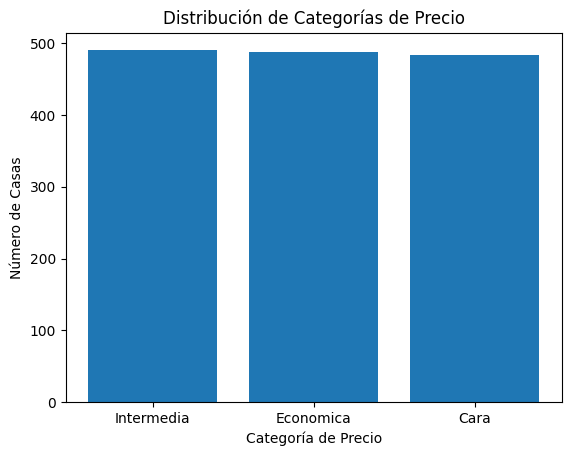

In [210]:
# Define the number of categories
num_categories = 3

# Define the category names
category_names = ['Economica', 'Intermedia', 'Cara']

# Create a new column in the DataFrame for the categories
houses_df['Precio_Categoria'] = pd.qcut(houses_df['SalePrice'], q=num_categories, labels=category_names)

# Verificar la distribución de las categorías
plt.bar(houses_df['Precio_Categoria'].value_counts().index, houses_df['Precio_Categoria'].value_counts().values)
plt.xlabel('Categoría de Precio')
plt.ylabel('Número de Casas')
plt.title('Distribución de Categorías de Precio')
plt.show()

In [211]:
preprocesador_categorico = OneHotEncoder(handle_unknown="ignore")
preprocesador_numerico = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

In [212]:
preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_categorico, categorical_columns),
    ('standard_scaler',preprocesador_numerico, numerical_columns)
], remainder="passthrough")

In [213]:
modelo = make_pipeline(preprocesador,MLPClassifier(activation="tanh",verbose=True,hidden_layer_sizes=(5,3)))
modelo

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exteri...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 3),
                               verbose=True))])

In [214]:
target = houses_df.pop('Precio_Categoria')
data = houses_df.drop(['Id', 'SalePrice'], axis=1)

In [215]:
random.seed(123)
data_train, data_test,target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [216]:
modelo.fit(data_train,target_train)

Iteration 1, loss = 1.13770134
Iteration 2, loss = 1.06977406
Iteration 3, loss = 1.02172981
Iteration 4, loss = 0.97447559
Iteration 5, loss = 0.92959029
Iteration 6, loss = 0.88071155
Iteration 7, loss = 0.83679956
Iteration 8, loss = 0.80135941
Iteration 9, loss = 0.77049536
Iteration 10, loss = 0.74363147
Iteration 11, loss = 0.72049173
Iteration 12, loss = 0.69966376
Iteration 13, loss = 0.68112949
Iteration 14, loss = 0.66468594
Iteration 15, loss = 0.64876127
Iteration 16, loss = 0.63416252
Iteration 17, loss = 0.62040504
Iteration 18, loss = 0.60737330
Iteration 19, loss = 0.59463116
Iteration 20, loss = 0.58284712
Iteration 21, loss = 0.57171777
Iteration 22, loss = 0.56031337
Iteration 23, loss = 0.54977572
Iteration 24, loss = 0.54004659
Iteration 25, loss = 0.53134592
Iteration 26, loss = 0.52173313
Iteration 27, loss = 0.51360355
Iteration 28, loss = 0.50520192
Iteration 29, loss = 0.49713037
Iteration 30, loss = 0.48975056
Iteration 31, loss = 0.48214734
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exteri...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 3),
                               verbose=True))])

In [217]:
pred = modelo.predict(data_test)

In [218]:
cm = confusion_matrix(target_test,pred)
accuracy=accuracy_score(target_test,pred)
precision =precision_score(target_test,pred,average='micro')
recall =  recall_score(target_test,pred,average='micro')
f1 = f1_score(target_test,pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[126   1  14]
 [  0 125  15]
 [ 16  24 117]]
Accuracy:  0.8401826484018264
Precision:  0.8401826484018264
recall:  0.8401826484018264


In [219]:
modelo = make_pipeline(preprocesador,MLPClassifier(activation="logistic",verbose=True,hidden_layer_sizes=()))

modelo

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exteri...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', hidden_layer_sizes=(),
                               verbose=True))])

In [220]:
modelo.fit(data_train,target_train)

Iteration 1, loss = 1.05383788
Iteration 2, loss = 0.96702379
Iteration 3, loss = 0.89629724
Iteration 4, loss = 0.83798082
Iteration 5, loss = 0.79058317
Iteration 6, loss = 0.75106231
Iteration 7, loss = 0.71940877
Iteration 8, loss = 0.69217923
Iteration 9, loss = 0.66843680
Iteration 10, loss = 0.64751574
Iteration 11, loss = 0.63037902
Iteration 12, loss = 0.61457077
Iteration 13, loss = 0.60163908
Iteration 14, loss = 0.58940671
Iteration 15, loss = 0.57904069
Iteration 16, loss = 0.56835321
Iteration 17, loss = 0.55840218
Iteration 18, loss = 0.54957696
Iteration 19, loss = 0.54192749
Iteration 20, loss = 0.53483353
Iteration 21, loss = 0.52732189
Iteration 22, loss = 0.51969687
Iteration 23, loss = 0.51400748
Iteration 24, loss = 0.50805983
Iteration 25, loss = 0.50270674
Iteration 26, loss = 0.49734546
Iteration 27, loss = 0.49288497
Iteration 28, loss = 0.48832420
Iteration 29, loss = 0.48379960
Iteration 30, loss = 0.47940774
Iteration 31, loss = 0.47543179
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exteri...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', hidden_layer_sizes=(),
                               verbose=True))])

In [221]:
pred = modelo.predict(data_test)

In [222]:
cm = confusion_matrix(target_test,pred)
accuracy=accuracy_score(target_test,pred)
precision =precision_score(target_test,pred,average='micro')
recall =  recall_score(target_test,pred,average='micro')
f1 = f1_score(target_test,pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[122   0  19]
 [  0 130  10]
 [ 15  22 120]]
Accuracy:  0.8493150684931506
Precision:  0.8493150684931506
recall:  0.8493150684931506
